In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

In [3]:
# Load the dataset
bike_rental_df = pd.read_csv('bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='weekday', ylabel='count'>

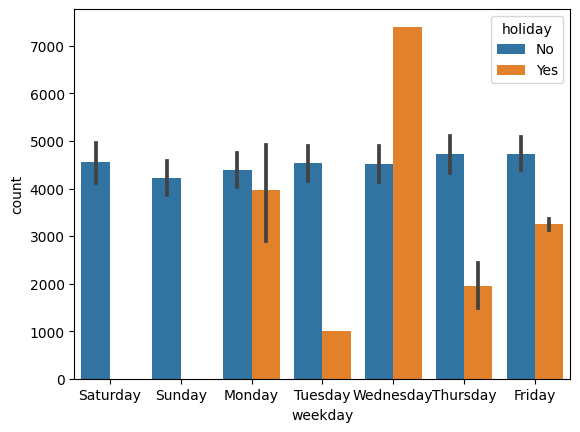

In [4]:

sns.barplot(data=bike_rental_df, x='weekday', y='count', hue='holiday')

In [5]:
### Comment here
#On most days the  bike rental will be less on a holiday, with the exception of Wednesday
#On wednesdays the average rental bikes increase on holidays

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

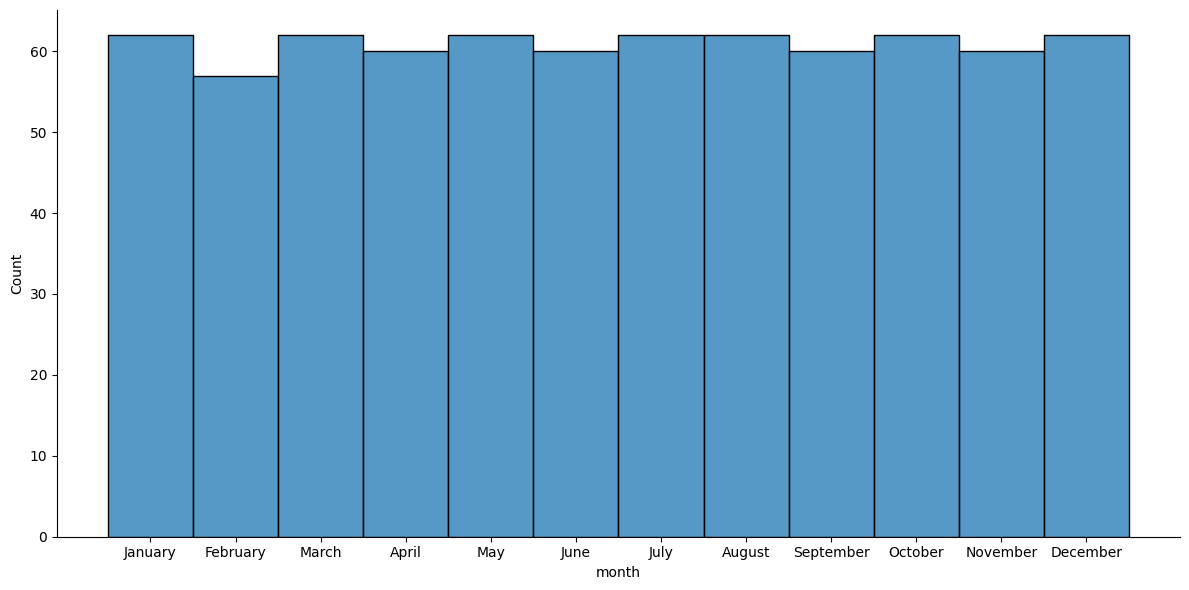

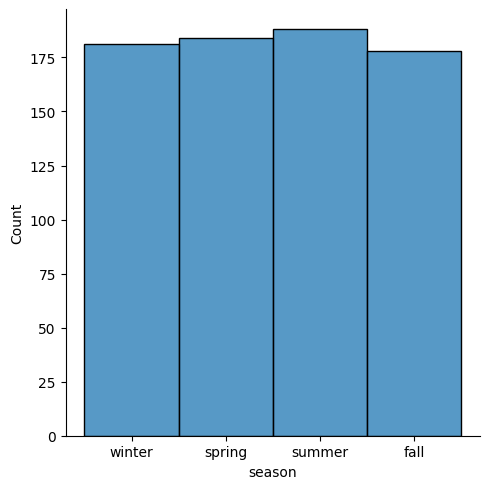

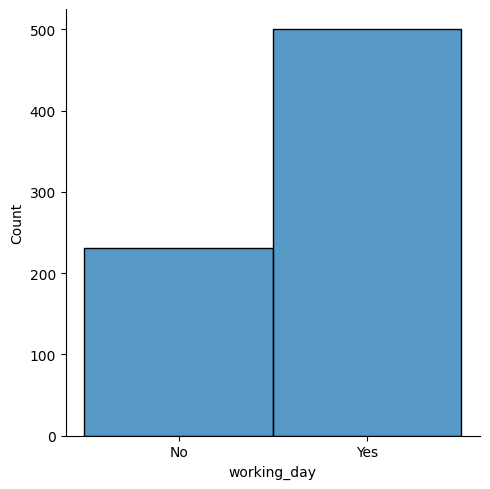

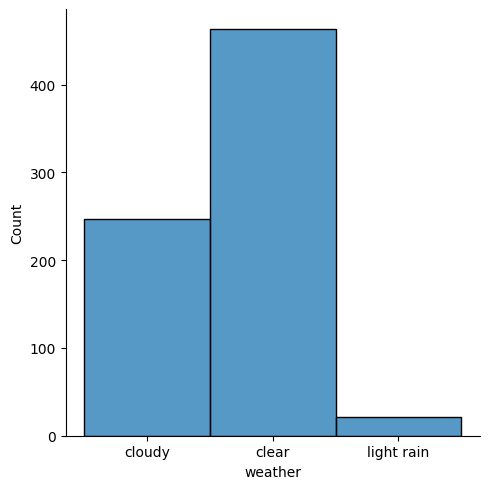

In [6]:
### Code here
sns.displot(data = bike_rental_df, x="month",height = 6, aspect =2)
sns.displot(data = bike_rental_df, x = "season")
sns.displot(data= bike_rental_df, x = "working_day")
sns.displot(data = bike_rental_df, x= "weather")

fxn()
warnings.simplefilter("ignore")


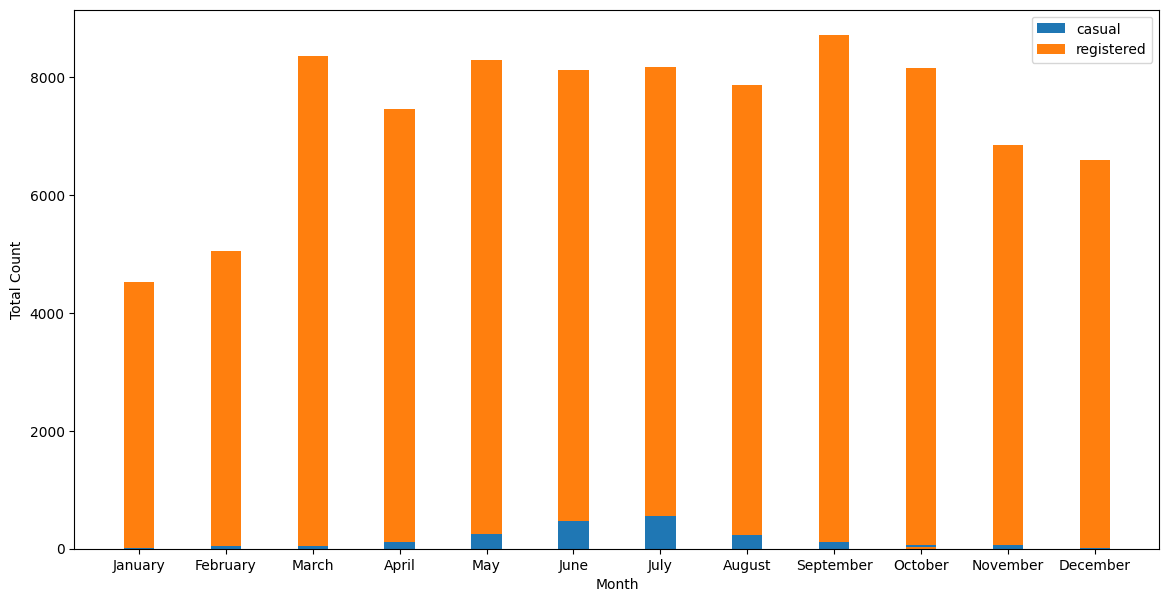

In [7]:
### Code here
bd=pd.DataFrame(bike_rental_df)
month= bd['month']
count = bd['count']
season = bd['season']
workingDay = bd ['working_day']
weather = bd['weather']
casual= bd['casual']
registered = bd['registered']

width=0.35
fig = plt.subplots(figsize = (14,7))
p1= plt.bar(month, casual,width)
p2=plt.bar(month, registered, width, bottom = casual)
plt.ylabel('Total Count')
plt.xlabel('Month')
plt.legend((p1[0], p2[0]), ('casual', 'registered'))
plt.show()

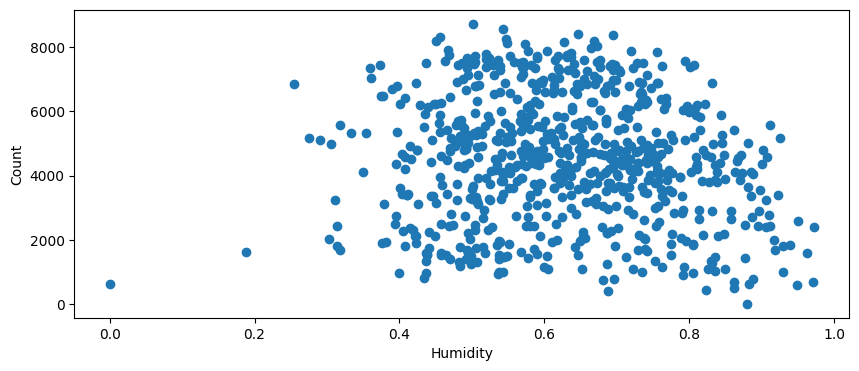

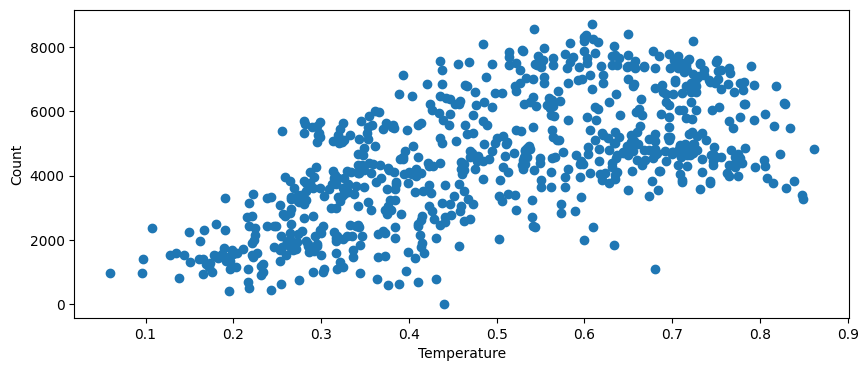

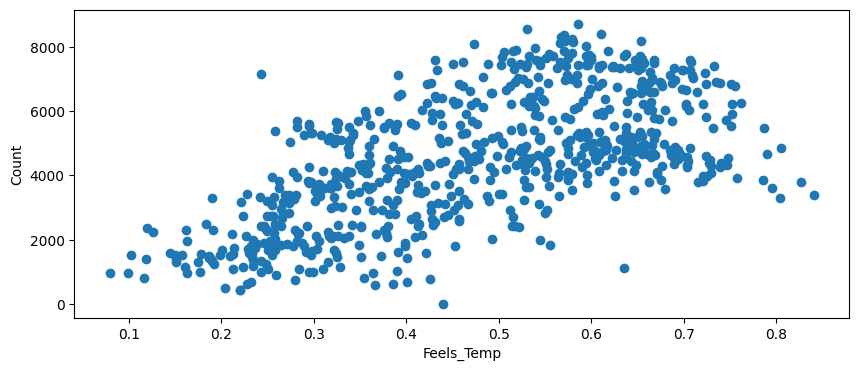

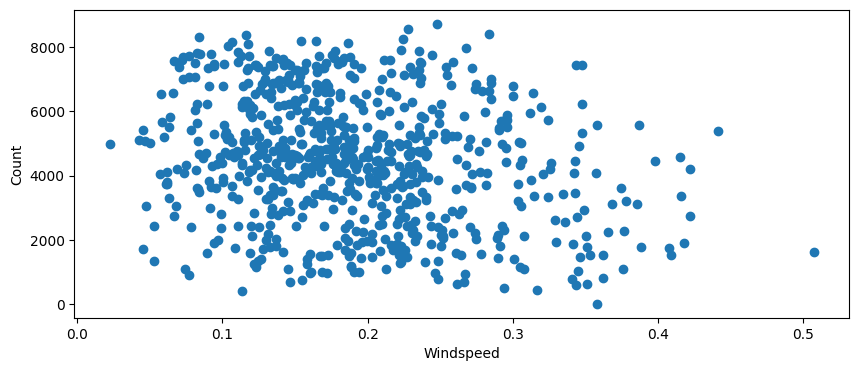

In [8]:
### Code here
temp = bd['temp']
feelsTemp = bd['feels_temp']
humidity = bd['humidity']
windspeed = bd['windspeed']

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(humidity,count)
ax.set_xlabel("Humidity")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(temp,count)
ax.set_xlabel("Temperature")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(feelsTemp,count)
ax.set_xlabel("Feels_Temp")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(windspeed, count)
ax.set_xlabel("Windspeed")
ax.set_ylabel("Count")
plt.show()

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

In [9]:
# split data into features and labels, Dropping casual and registered as well according to instructions

bike_rental_X = bike_rental_df.drop(columns=['count']+['casual']+['registered'])
bike_rental_y = bike_rental_df['count']


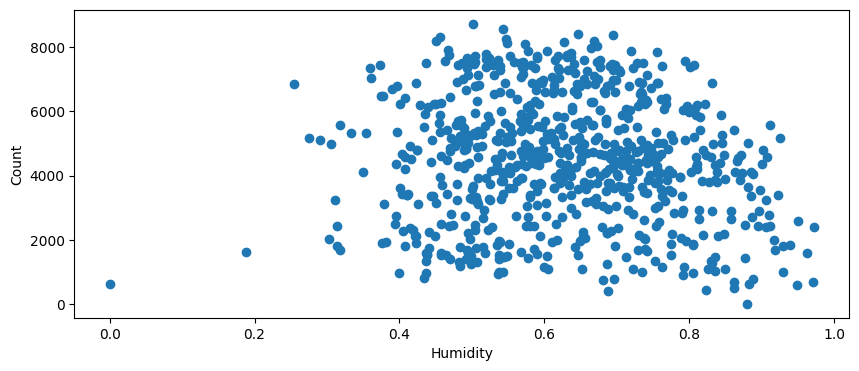

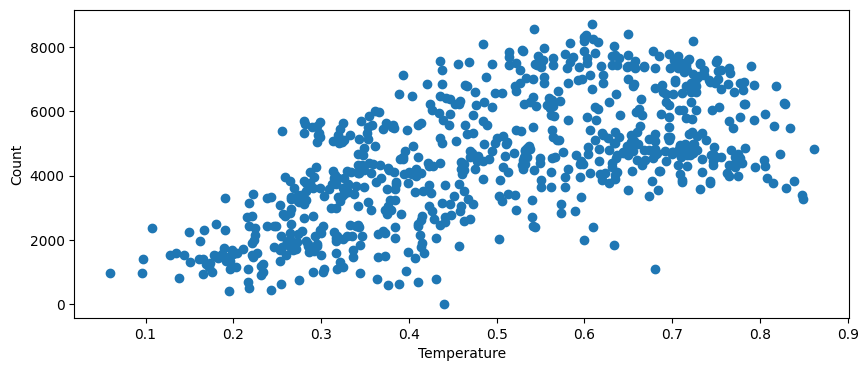

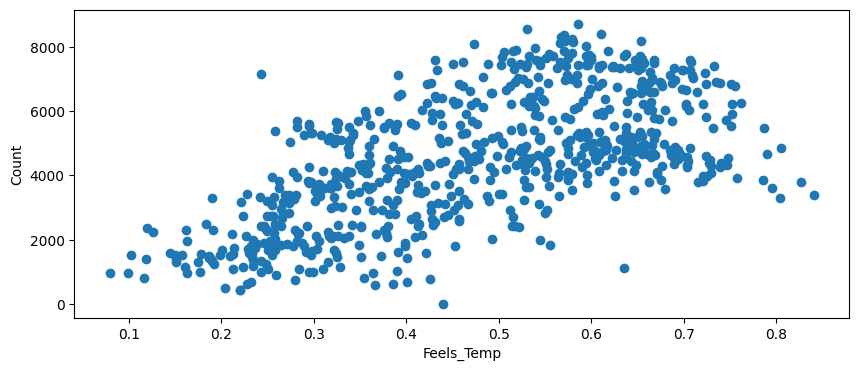

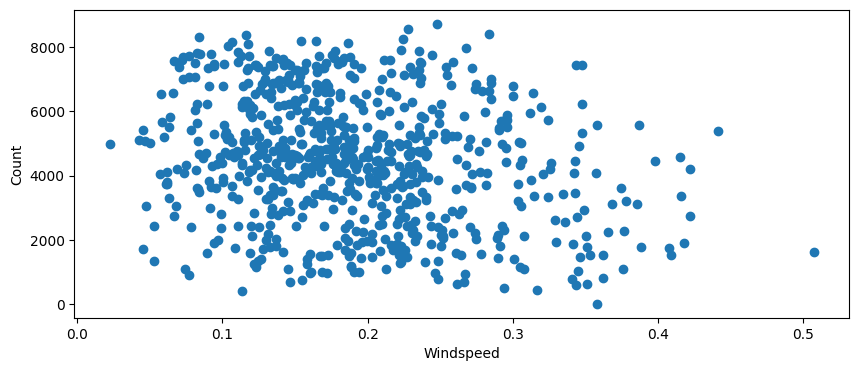

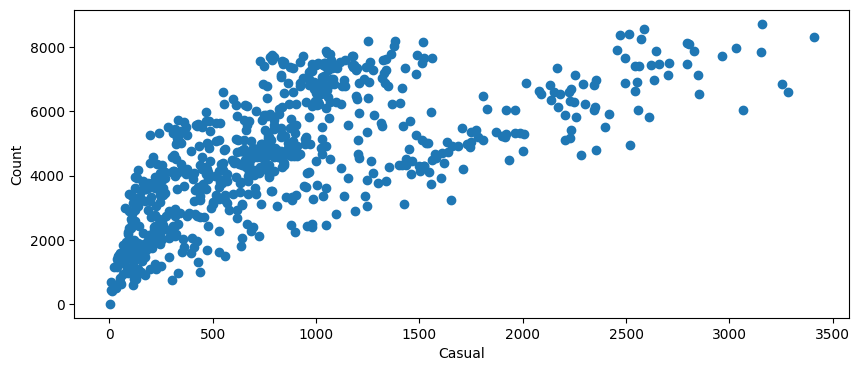

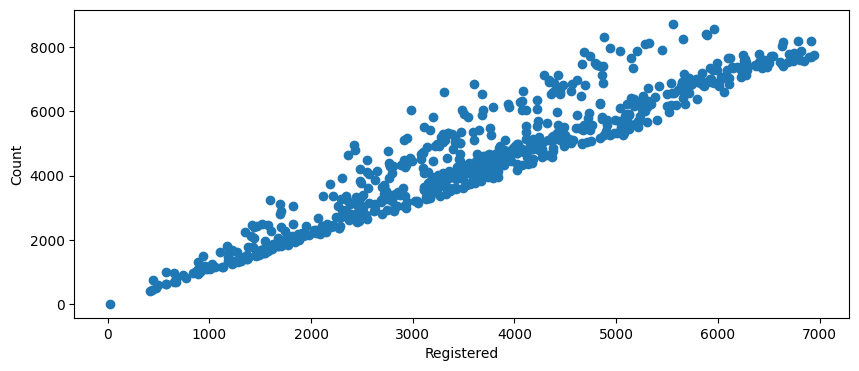

In [10]:
casual = bike_rental_df['casual']
registered = bike_rental_df['registered']
count = bike_rental_df['count']
temp = bike_rental_df['temp']
feelsTemp = bike_rental_df['feels_temp']
humidity = bike_rental_df['humidity']
windspeed = bike_rental_df['windspeed']
fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(humidity,count)
ax.set_xlabel("Humidity")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(temp,count)
ax.set_xlabel("Temperature")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(feelsTemp,count)
ax.set_xlabel("Feels_Temp")
ax.set_ylabel("Count")

fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(windspeed, count)
ax.set_xlabel("Windspeed")
ax.set_ylabel("Count")
plt.show()


fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(casual, count)
ax.set_xlabel("Casual")
ax.set_ylabel("Count")
plt.show()


fig, ax=plt.subplots(figsize=(10,4))
ax.scatter(registered, count)
ax.set_xlabel("Registered")
ax.set_ylabel("Count")
plt.show()

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [12]:
### Code here
#printing the categorical columns
a = (bike_rental_df.dtypes == 'object')
object_col = list(a[a].index)
print(object_col)




['month', 'season', 'holiday', 'weekday', 'working_day', 'weather']


In [13]:
### Code here
OHE_data = pd.get_dummies(bike_rental_X, columns=['month', 'season','holiday','weekday','working_day','weather'],dtype = float, drop_first=True)
OHE_data


,temp,feels_temp,humidity,windspeed,month_August,month_December,month_February,month_January,month_July,month_June,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_Yes,weather_cloudy,weather_light rain
0,0.344167,0.363625,0.805833,0.160446,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.363478,0.353739,0.696087,0.248539,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.196364,0.189405,0.437273,0.248309,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,0.212122,0.590435,0.160296,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.226957,0.229270,0.436957,0.186900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
727,0.253333,0.255046,0.590000,0.155471,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,0.253333,0.242400,0.752917,0.124383,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
729,0.255833,0.231700,0.483333,0.350754,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### Code here
bike_rental_Z=bike_rental_X.drop(columns = object_col)

print(bike_rental_Z.corr())


                temp  feels_temp  humidity  windspeed
temp        1.000000    0.991702  0.126963  -0.157944
feels_temp  0.991702    1.000000  0.139988  -0.183643
humidity    0.126963    0.139988  1.000000  -0.248489
windspeed  -0.157944   -0.183643 -0.248489   1.000000


<Axes: >

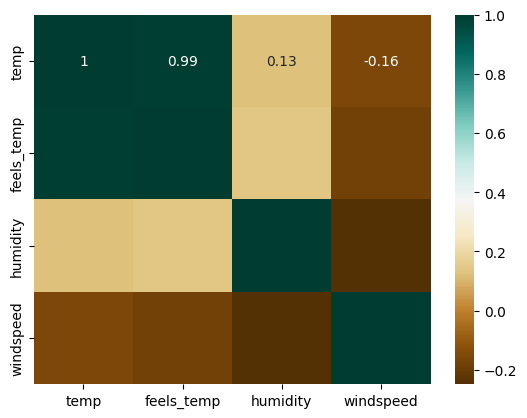

In [15]:
### Code here
sns.heatmap(bike_rental_Z.corr(), annot=True, cmap = "BrBG")

In [16]:

#Pairs of highly correlates matrix - temp&feels_temp
# Dropping feels_temp
Dropped_Data=OHE_data.drop(columns = ['feels_temp'])



In [17]:
### Code here
X = Dropped_Data
y = bike_rental_df['count']
bike_rental_X_train, bike_rental_X_test, bike_rental_y_train, bike_rental_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

bike_rental_X_train, bike_rental_X_val, bike_rental_y_train, bike_rental_y_val = train_test_split(bike_rental_X_train, bike_rental_y_train, test_size=0.25, random_state=1) # as 0.25 * 0.8 = 0.2

In [18]:
### Code here
scale = StandardScaler()
scale.fit_transform(bike_rental_X_train)
scale.transform(bike_rental_X_test)
scale.transform(bike_rental_X_val)

array([[ 0.21014648, -0.8228145 ,  0.51773013, ...,  0.65678958,
        -0.78121323, -0.16783627],
       [-0.7341855 ,  0.31887269,  1.06605223, ...,  0.65678958,
        -0.78121323, -0.16783627],
       [ 1.03171366,  0.57883335, -0.6455184 , ...,  0.65678958,
         1.28006024, -0.16783627],
       ...,
       [ 1.24418793, -1.73716108, -1.11102583, ...,  0.65678958,
        -0.78121323, -0.16783627],
       [-1.041089  , -0.93956177, -0.6217864 , ...,  0.65678958,
         1.28006024, -0.16783627],
       [-1.91459622, -1.21133398,  1.40540334, ...,  0.65678958,
        -0.78121323, -0.16783627]])

In [19]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])


### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [20]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
     
        XT = np.transpose(X)
        I = np.identity(X.shape[1])
        
        self.w = np.linalg.solve((np.dot(XT,X) + self.alpha * I), np.dot(XT,y))
       
        
        return None
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        #
        y_pred = np.dot(X,self.w)

        return y_pred
        

### Train, Evaluate, and Interpret LR Model

In [21]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.
    
    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [22]:
### Code here
model = LinearRegression()
model.train(bike_rental_X_train, bike_rental_y_train)
y_pred_train=model.predict(bike_rental_X_train)
y_pred_val= model.predict(bike_rental_X_val)
y_pred_test=model.predict(bike_rental_X_test)

print(r2_score(bike_rental_y_train, y_pred_train))
print(r2_score(y_pred_val,bike_rental_y_val ))
print(r2_score(bike_rental_y_test, y_pred_test))


0.57076268786424
0.036645604665391796
0.5743814674481612


In [23]:
#Reporting First three predictions and test sets 
Report1 = get_report(y_pred_test, bike_rental_y_test)
print(Report1)

           Prediction  Actual
Position                     
1         2599.899563    3830
2         1667.743577    2114
3         6630.256933    3915
145       2278.460164    1538
146       3684.844574    5382
147       4272.682297     623


In [24]:
### Code here
mean_train_labels=np.mean(bike_rental_y_train)
baseline_pred_train = np.full_like(bike_rental_y_train, mean_train_labels)
baseline_pred_val =np.full_like(bike_rental_y_val, mean_train_labels)
baseline_pred_test = np.full_like(bike_rental_y_test, mean_train_labels)

print(r2_score(bike_rental_y_train, baseline_pred_train))
print(r2_score(bike_rental_y_val,baseline_pred_val ))
print(r2_score(bike_rental_y_test, baseline_pred_test))

-6.89438075518467e-08
-1.2918920377913423e-08
-0.055291971865233824


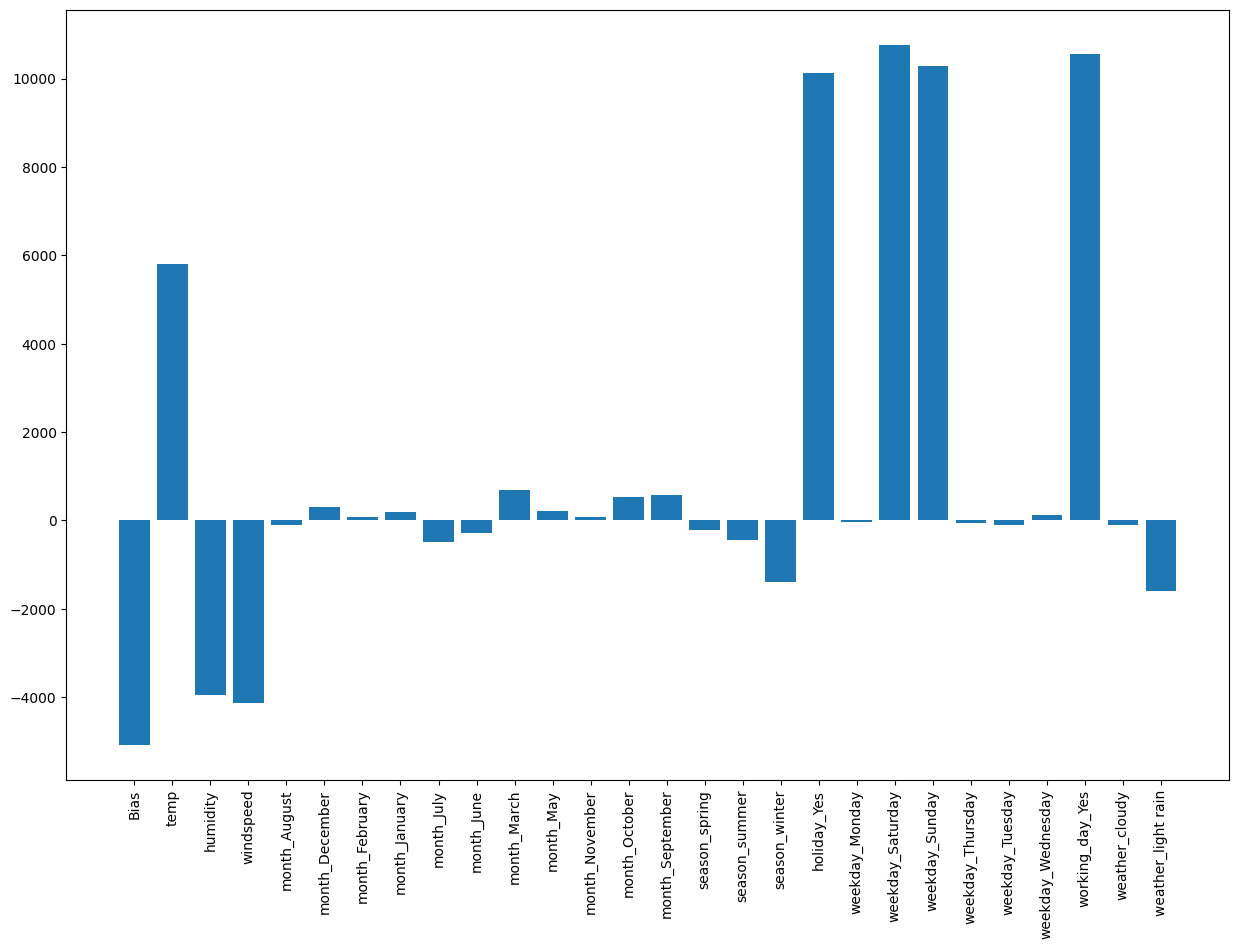

In [25]:
### 


weights = model.w.flatten()
plt.figure(figsize=(15,10))
plt.bar(["Bias"]+Dropped_Data.columns.to_list(), weights)
plt.xticks(rotation=90)
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [26]:
### Comment here
# As I used created more divisions using different one hot encoding, so the greates contributors to car price are cloudy weather,
#the weekday Saturday and sunday, windspeed, humidity and temperature

### Hyperparameter Tuning ($\alpha$)

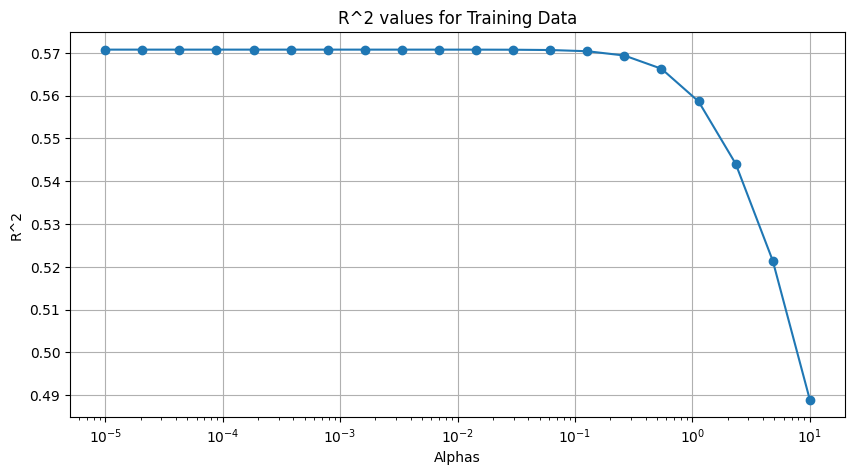

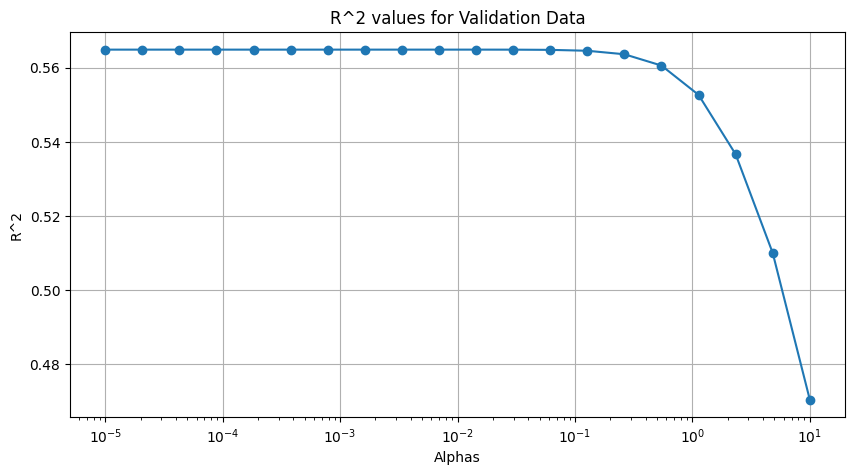

In [27]:
### Code here
def grid_search(alphas):
    r2_array_train = [] #storing R2 values for training data
    r2_array_validate = [] #storing R2 values for validation data
    
    for i in range(len(alphas)):
        a = alphas[i]
        model = LinearRegression(a)
        model.train(bike_rental_X_train, bike_rental_y_train)
        y_pred_train=model.predict(bike_rental_X_train)
        y_pred_val= model.predict(bike_rental_X_val)
        r2_train = r2_score(bike_rental_y_train, y_pred_train)
        r2_validate = r2_score(bike_rental_y_val, y_pred_val)

        r2_array_train.append(r2_train)
        r2_array_validate.append(r2_validate)
        
    plt.figure(figsize=(10, 5))
    plt.plot(alphas, r2_array_train, marker='o', linestyle='-')
    plt.title('R^2 values for Training Data')
    plt.xlabel('Alphas')
    plt.ylabel('R^2')
    plt.xscale('log')
    plt.grid(True)
    plt.show()

    
    plt.figure(figsize=(10, 5))
    plt.plot(alphas, r2_array_validate, marker='o', linestyle='-')
    plt.title('R^2 values for Validation Data')
    plt.xlabel('Alphas')
    plt.ylabel('R^2')
    plt.xscale('log')
    plt.grid(True)
    plt.show()


alphas = np.logspace(-5, 1, 20) 
grid_search(alphas)


**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [28]:
### Comment here TODO
#with the decreasing model complexity, training and validation R^2 decreases.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [29]:
### Code here
loan_data_df = pd.read_csv('loan_data.csv')
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
 loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

In [31]:
loan_data_df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [32]:
### Finding the number of missing values
loan_data_df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [34]:
#Replacing NA values
for column in loan_data_df.columns:
    if loan_data_df[column].dtype != 'object':
        loan_data_df[column] = loan_data_df[column].fillna(loan_data_df[column].mean())
    elif loan_data_df[column].dtype == 'object':
        replace = loan_data_df[column].mode()[0]  # Get the mode value
        loan_data_df[column] = loan_data_df[column].fillna(replace)
#Verifying
loan_data_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
### Comment here
#As the number of missing values is high it is not a good idea to drop them. 
#For features with object data type, I replaced them with the mode value and for numerical values, the best thing to do is to take the mean

In [36]:
### Code here
b = (loan_data_df.dtypes == 'object')
object_colb = list(b[b].index)

encoder = OrdinalEncoder()

encoded_df = encoder.fit_transform(loan_data_df[object_colb])
loan_data_df[object_colb] = encoded_df
loan_data_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


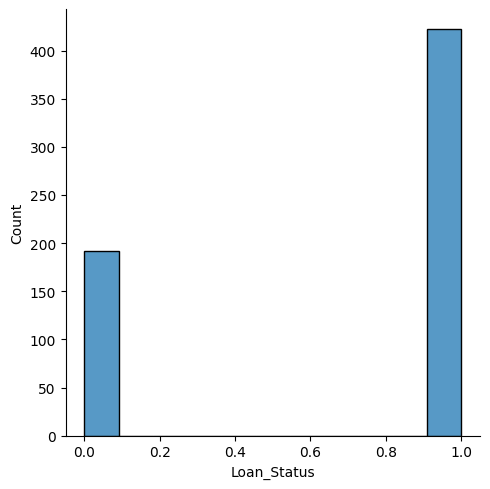

In [37]:
### Code here
sns.displot(data = loan_data_df, x= "Loan_Status")

In [39]:
### Code 
# Dropping Categorical Variables and Y variable
#since Y variable is also an object(Loan_Status) 
#it doesn't need to be dropped seperately
loan_data_X = loan_data_df.drop(columns = object_colb)
print(loan_data_X.corr())

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.038801   
Credit_History           -0.014477          -0.001665   -0.007738   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045242       -0.014477  
CoapplicantIncome         -0.059675       -0.001665  
LoanAmount                 0.038801       -0.007738  
Loan_Amount_Term           1.000000        0.001395  
Credit_History             0.001395        1.000000  


<Axes: >

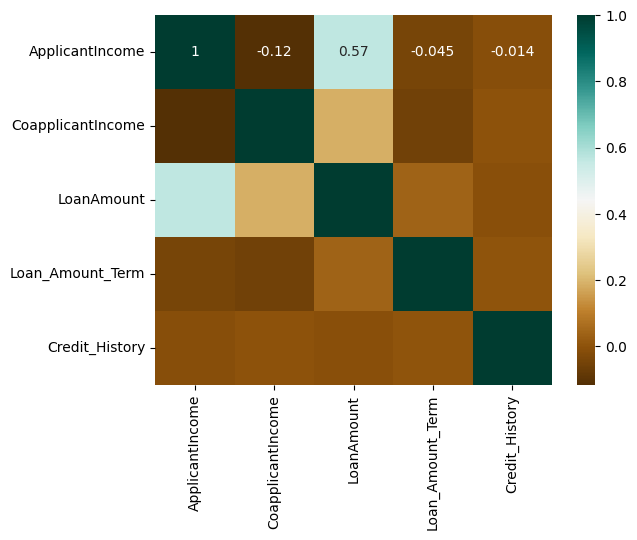

In [40]:
### Code here
sns.heatmap(loan_data_X.corr(), annot=True, cmap = "BrBG")

In [41]:
### As none of the numerical features are strongly, none of them are dropped.


In [42]:
loan_data_df['Loan_Status']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [43]:
### Code here
#Converting to a Numpy Vector
label = loan_data_df['Loan_Status']
label_vector = label.values


#print(label_vector)
#spliting dataset
X1 = loan_data_df.drop(columns = ['Loan_Status'], axis =1)
y1 = label_vector
y1= y1.reshape(-1,1)
loan_data_X_train, loan_data_X_test, loan_data_y_train, loan_data_y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

loan_data_X_train, loan_data_X_val, loan_data_y_train, loan_data_y_val = train_test_split(loan_data_X_train, loan_data_y_train, test_size=0.25, random_state=1) # as 0.25 * 0.8 = 0.2


#Scaling Data
scale = StandardScaler()
loan_data_X_train= scale.fit_transform(loan_data_X_train)
loan_data_X_test=scale.transform(loan_data_X_test)
loan_data_X_val=scale.transform(loan_data_X_val)

#Bias Term
loan_data_X_train = np.hstack([np.ones((loan_data_X_train.shape[0], 1)), loan_data_X_train])
loan_data_X_val = np.hstack([np.ones((loan_data_X_val.shape[0], 1)), loan_data_X_val])
loan_data_X_test = np.hstack([np.ones((loan_data_X_test.shape[0], 1)), loan_data_X_test])


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [44]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

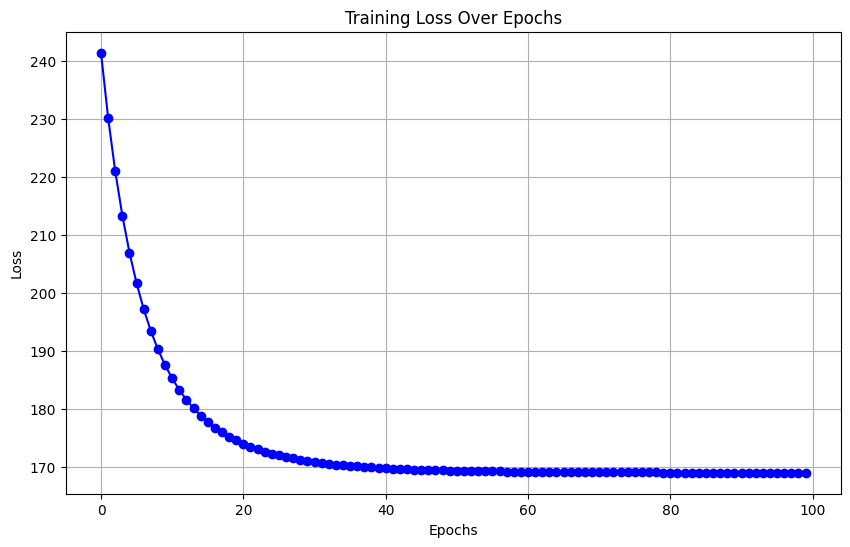

In [45]:
### Code here
model1 = LogisticRegression()
losses = model1.train(loan_data_X_train, loan_data_y_train)
y1_pred_train=model1.predict(loan_data_X_train)
y1_pred_val= model1.predict(loan_data_X_val)
y1_pred_test=model1.predict(loan_data_X_test)
#print(y1_pred_train)
#print(loan_data_y_train)

losses = np.reshape(losses, -1)

# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot( losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
import random
alpha_range = np.linspace(0, 1, num=100)
eta_range = np.linspace(0, 0.001, num=100)
t_range = np.arange(1, 101)

best_accuracy = 0
best_hyperparameters = {}

for i in range(20):
    alpha = random.choice(alpha_range)
    eta = random.choice(eta_range)
    t = random.choice(t_range)
    model1 = LogisticRegression(alpha = alpha , eta = eta, t=t)
    model1.train(loan_data_X_train, loan_data_y_train)

    loss = model1.train(loan_data_X_train, loan_data_y_train)

    y1a_pred_val = model1.predict(loan_data_X_val)

    accuracy = accuracy_score(loan_data_y_val, y1a_pred_val)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = {'alpha': alpha, 'eta': eta, 't': t}

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
    

Best Hyperparameters:
{'alpha': 0.6565656565656566, 'eta': 0.00018181818181818183, 't': 24}
Best Validation Accuracy: 0.8048780487804879


In [47]:
# Comparing 
model1 = LogisticRegression()
model1.train(loan_data_X_train, loan_data_y_train)
yO_pred_test=model1.predict(loan_data_X_test)
model2 = LogisticRegression(alpha = 0.879, eta = 0.00043, t = 43)
model2.train(loan_data_X_train, loan_data_y_train)
yB_pred_test = model2.predict(loan_data_X_test)
accuracy1 = accuracy_score(loan_data_y_test, yO_pred_test)
accuracy2 = accuracy_score(loan_data_y_test, yB_pred_test)
print("Original model accuracy", accuracy1)
print("Best model accuracy", accuracy2)

Original model accuracy 0.7967479674796748
Best model accuracy 0.8048780487804879


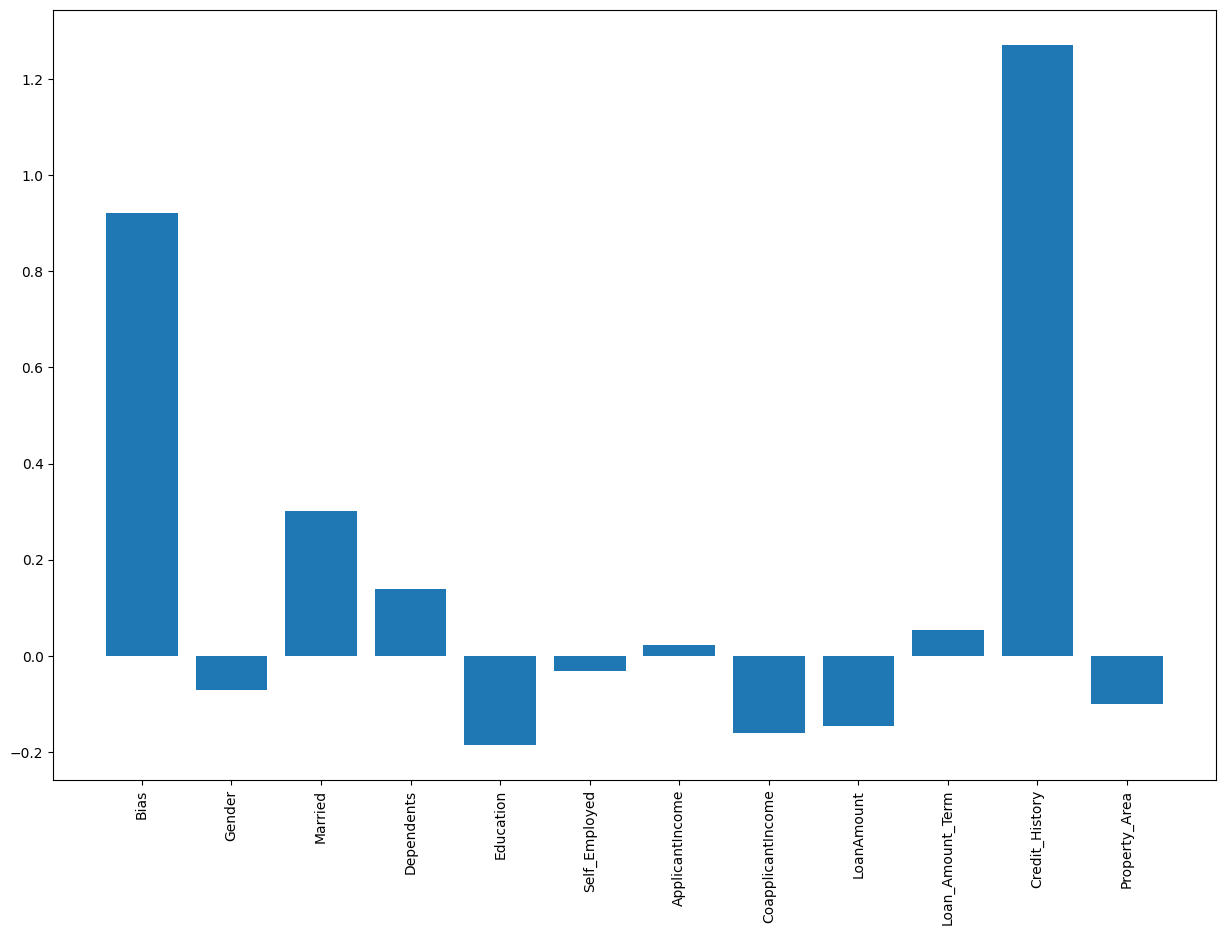

In [49]:
### Code here
weights = model1.w.flatten()
plt.figure(figsize=(15,10))
plt.bar(["Bias"]+X1.columns.to_list(), weights)
plt.xticks(rotation=90)
plt.show()

In [ ]:
### Comment here
# Credit_history, Married, Education, CoapplicantIncome

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

In [ ]:
### Code here
svm = LinearSVC(dual = False)

svm.fit(loan_data_X_train, loan_data_y_train)

y3_train_pred = svm.predict(loan_data_X_train)
y3_val_pred = svm.predict(loan_data_X_val)
y3_test_pred = svm.predict(loan_data_X_test)

accuracy_train = accuracy_score(loan_data_y_train, y3_train_pred)
accuracy_val = accuracy_score(loan_data_y_val, y3_val_pred)
accuracy_test = accuracy_score(loan_data_y_test, y3_test_pred)

print("Training Accuracy is", accuracy_train)
print("Validation Accuracy is", accuracy_val)
print("Test Accuracy is", accuracy_test)

In [ ]:
### Code here

svm = SVC()

svm.fit(loan_data_X_train, loan_data_y_train)

y3_train_pred = svm.predict(loan_data_X_train)
y3_val_pred = svm.predict(loan_data_X_val)
y3_test_pred = svm.predict(loan_data_X_test)

accuracy_svm_train = accuracy_score(loan_data_y_train, y3_train_pred)
accuracy_svm_val = accuracy_score(loan_data_y_val, y3_val_pred)
accuracy_svm_test = accuracy_score(loan_data_y_test, y3_test_pred)

print("Training Accuracy is", accuracy_svm_train)
print("Validation Accuracy is", accuracy_svm_val)
print("Test Accuracy is", accuracy_svm_test)